# Iris 데이터를 활용한 랜덤포레스트 & 부스팅

## 0. Iris 데이터 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# !pip3 install xgboost
import xgboost
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

## 1. Iris 데이터 시각화

In [2]:
# Iris 데이터를 pandas의 dataframe으로 만들고, 데이터 형태를 살펴보자.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


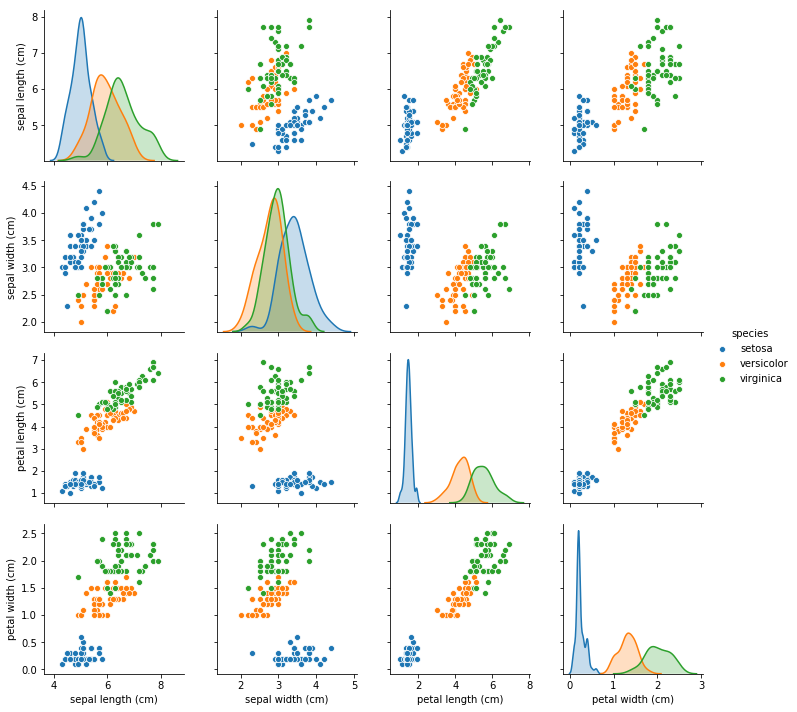

In [3]:
# iris 데이터의 species는 classification을 위해 정수 형태(0, 1, 2)로 되어 있음
# 시각화를 위해 species integer를 species name으로 바꾼 새로운 열을 df에 추가
df['species'] = np.array([iris.target_names[i] for i in iris.target])

# 시각화 라이브러리인 seaborn으로 pairplot을 그려보자.
sns.pairplot(df, hue='species')

## 2. train set, test set 만들기

In [4]:
# sklearn에서 train_test_split 함수 불러오기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, 
                                                    test_size=0.25, stratify=iris.target, random_state=123456)

# train_test_split(x, y, test_size, stratify, random_state)
# test_size : 테스트 데이터 사이즈
# train_size : 트레인 데이터 사이즈
# stratify : 클래스 라벨
# random_state : 난수 시드

## 3. 랜덤포레스트 모델 만들기

In [5]:
# sklearn에서 RandomForestClassifier 함수 불러오기
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# n_estimators : 생성할 트리의 개수
# oob_score : out-of-bag score, 예측이 얼마나 정확한가에 대한 추정을 수치로 나타낸 것

rf.fit(X_train, y_train)
# rf.fit(features, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

## 4. test set에 적합하기

In [6]:
# sklearn에서 accuracy_score 함수 불러오기
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test) # rf 모델에 X_test를 넣고 그 예측값을 predicted에 저장
accuracy = accuracy_score(y_test, predicted) # 실제 데이터와 예측값이 일치하는 비율

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.946
Mean accuracy score: 0.921


## 5. confusion matrix로 분류 결과 시각화

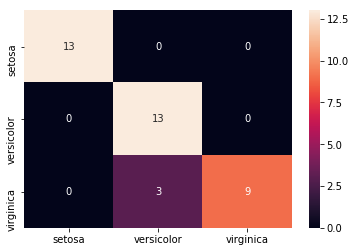

In [7]:
# sklearn에서 confusion_matrix 함수 불러오기
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
# confusion_matrix는 라벨이 있는 경우 분류 모델을 평가하는 방법
# column은 predicted, row는 y_test
sns.heatmap(cm, annot=True) # sns 라이브러리에 있는 heatmap으로 cm을 시각화

# setosa는 정확히 분류해 내고 있지만, versicolor와 virginica의 구별은 명확하지 않다.

## [HomeWork]  랜덤포레스트 결과를 xgboost로 재현합니다.

## 1. xgboost 모델 만들기

In [14]:
xg = xgboost.XGBClassifier()
xg.fit

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
xg = xgboost.XGBClassifier(objective='multi:softprob', max_depth=2)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## 2. test set에 적합하기

In [9]:
xg_predicted = xg.predict(X_test)
xg_accuracy = accuracy_score(y_test,xg_predicted) # 실제 데이터와 예측값이 일치하는 비율
print(f'Mean accuracy score of Xgboost: {accuracy:.3}')

Mean accuracy score of Xgboost: 0.921


## 3. confusion matrix로 분류 결과 시각화

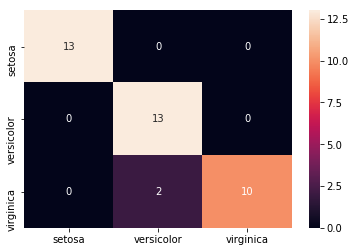

In [10]:
xg_cm = pd.DataFrame(confusion_matrix(y_test, xg_predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(xg_cm, annot=True) # sns 라이브러리에 있는 heatmap으로 cm을 시각화


## 4. 랜덤포레스트와 xgboost의 결과를 비교해주세요.  
[confusion matrix 해석하기](https://www.python-course.eu/confusion_matrix.php)

accuracy 는 0.921로 동일하다.  
confusion matrix 확일 결과 두 모델 모두 setosa와 versicolor는 정확히 분류해 내고 있지만, virginica의 구별은 명확하지 않다.